In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def boxplot_data(df,var):
    q3=df[var][df['quality']==3]
    q4=df[var][df['quality']==4]
    q5=df[var][df['quality']==5]
    q6=df[var][df['quality']==6]
    q7=df[var][df['quality']==7]
    q8=df[var][df['quality']==8]
    trace0 = go.Box(y=q3,name='3')
    trace1 = go.Box(y=q4,name='4')
    trace2 = go.Box(y=q5,name='5')
    trace3 = go.Box(y=q6,name='6')
    trace4 = go.Box(y=q7,name='7')
    trace5 = go.Box(y=q8,name='8')
    data=[trace0,trace1,trace2,trace3,trace4,trace5]
    return data

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

In [7]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/EciEca/datathon24/main/winequality-red.csv")
wine_df.shape

(1599, 12)

In [8]:
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [9]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(wine_df,test_size=0.2,random_state= 1234)

In [11]:
import plotly.graph_objects as go
train['quality'].value_counts()

quality
5    543
6    507
7    160
4     45
8     16
3      8
Name: count, dtype: int64

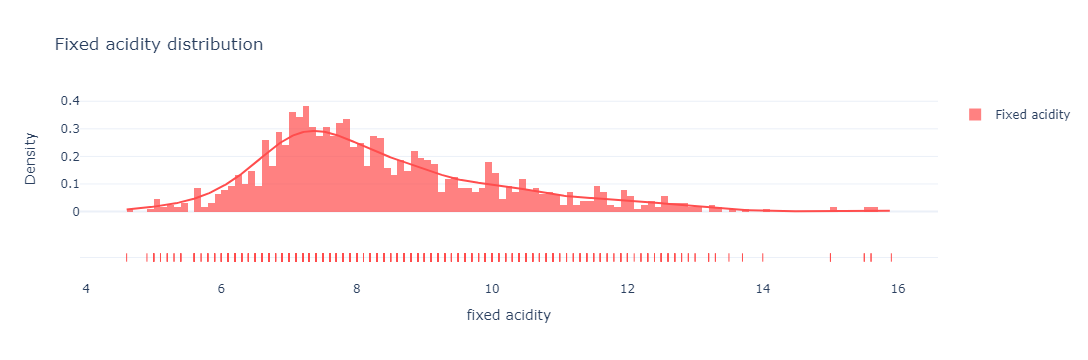

In [12]:
import plotly.figure_factory as ff
from plotly.offline import iplot
colors = ['#ff4d4d']
fig = ff.create_distplot([train['fixed acidity']],['Fixed acidity'],bin_size=0.1,colors=colors)
fig.update_layout(title="Fixed acidity distribution",xaxis_title="fixed acidity",yaxis_title="Density",font=dict(size=12))
iplot(fig, filename='Basic Distplot')

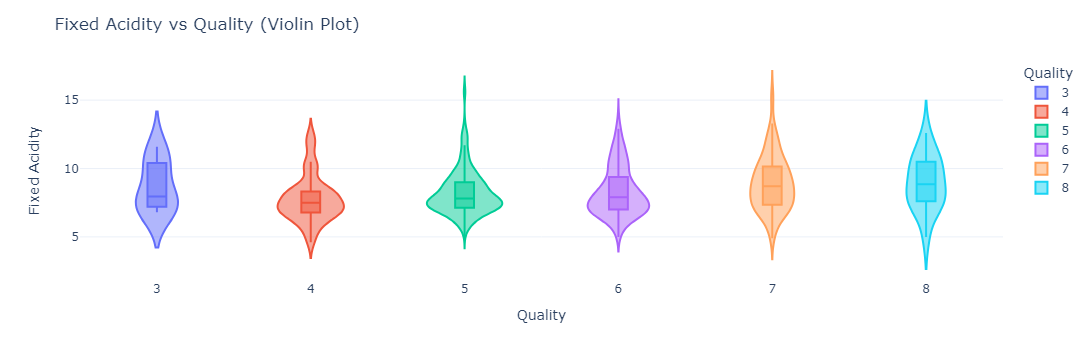

In [15]:
import plotly.express as px

fig = px.violin(train, x='quality', y='fixed acidity', box=True, points=False, color="quality",
                category_orders={"quality": sorted(train['quality'].unique())})

# Customize the layout
fig.update_layout(
    title="Fixed Acidity vs Quality (Violin Plot)",
    xaxis_title="Quality",
    yaxis_title="Fixed Acidity",
    legend_title="Quality",
    font=dict(size=12)
)

fig.show()

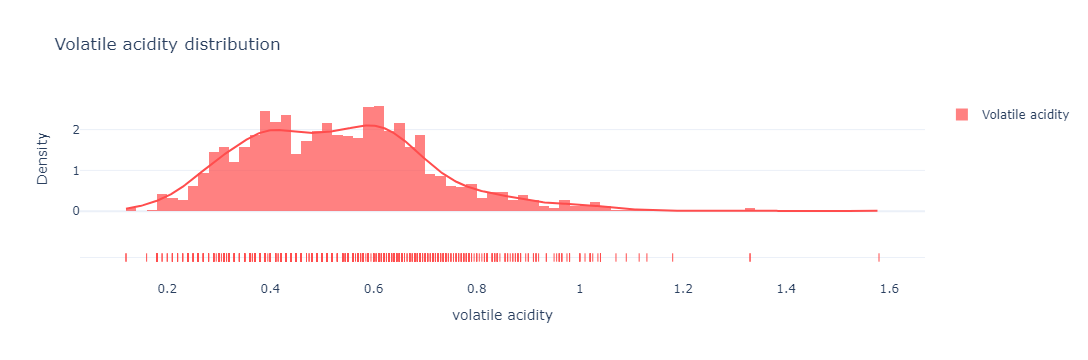

In [16]:
fig = ff.create_distplot([train['volatile acidity']],['Volatile acidity'],bin_size=0.02,colors=colors)
fig.update_layout(title="Volatile acidity distribution",xaxis_title="volatile acidity",yaxis_title="Density",font=dict(size=12))
iplot(fig, filename='Basic Distplot')

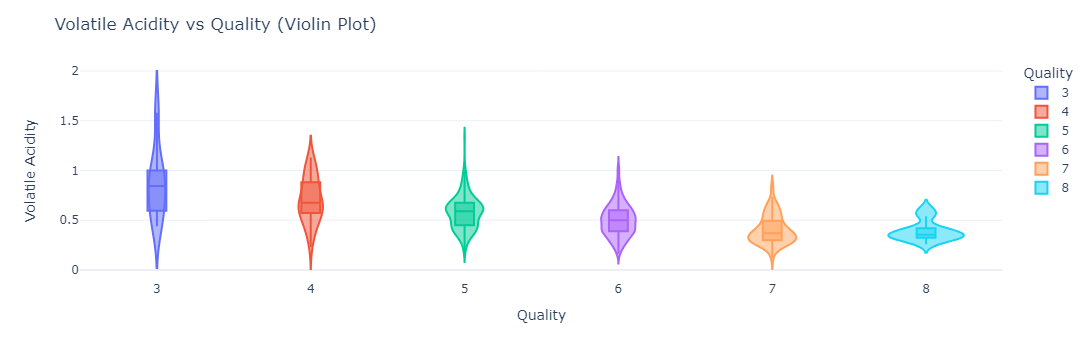

In [36]:
fig = px.violin(train, x='quality', y='volatile acidity', box=True, points=False, color="quality",
                category_orders={"quality": sorted(train['quality'].unique())})

fig.update_layout(
    title="Volatile Acidity vs Quality (Violin Plot)",
    xaxis_title="Quality",
    yaxis_title="Volatile Acidity",
    legend_title="Quality",
    font=dict(size=12)
)

fig.show()

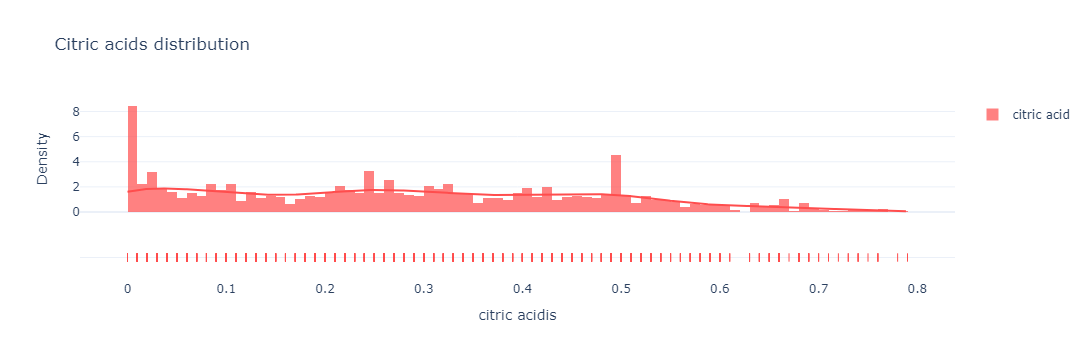

In [18]:
fig = ff.create_distplot([train['citric acid']],['citric acid'],bin_size=0.01,colors=colors)
fig.update_layout(title="Citric acids distribution",xaxis_title="citric acidis",yaxis_title="Density",font=dict(size=12))
iplot(fig, filename='Basic Distplot')

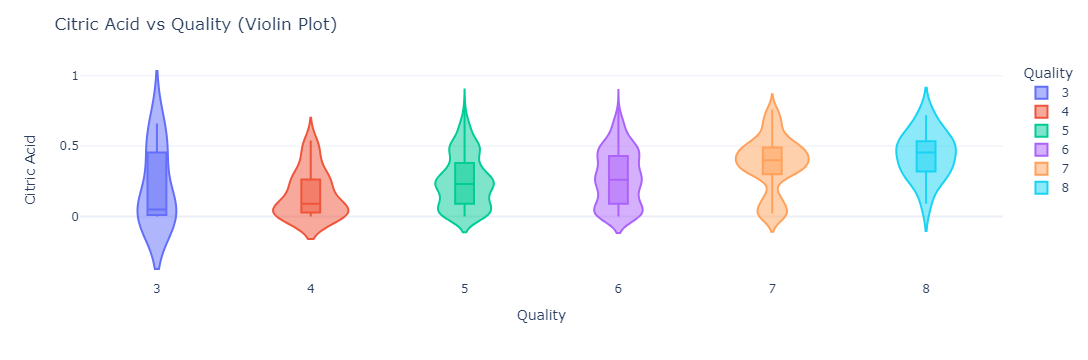

In [37]:
fig = px.violin(train, x='quality', y='citric acid', box=True, points=False, color="quality",
                category_orders={"quality": sorted(train['quality'].unique())})

fig.update_layout(
    title="Citric Acid vs Quality (Violin Plot)",
    xaxis_title="Quality",
    yaxis_title="Citric Acid",
    legend_title="Quality",
    font=dict(size=12)
)

fig.show()

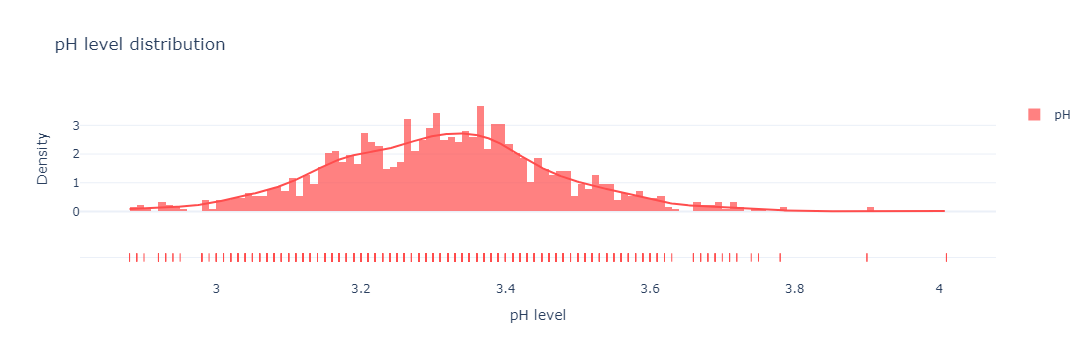

In [20]:
fig = ff.create_distplot([train['pH']],['pH'],bin_size=0.01,colors=colors)
fig.update_layout(title="pH level distribution",xaxis_title="pH level",yaxis_title="Density",font=dict(size=12))
iplot(fig, filename='Basic Distplot')

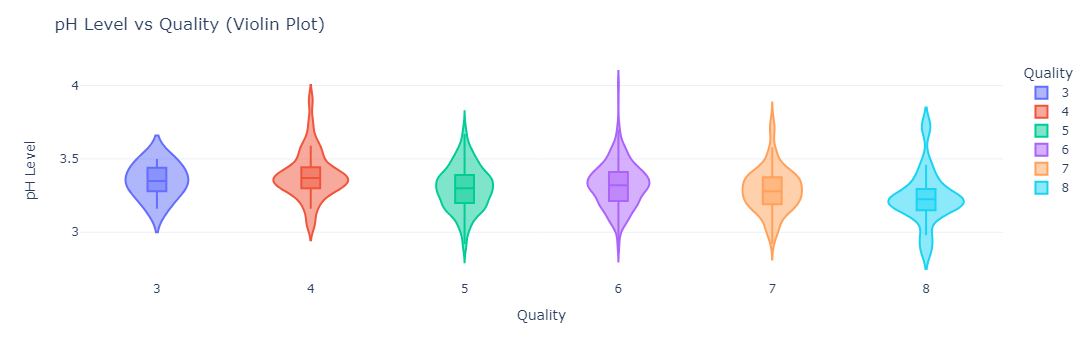

In [41]:
fig = px.violin(train, x='quality', y='pH', box=True, points=False, color="quality",
                category_orders={"quality": sorted(train['quality'].unique())})

fig.update_layout(
    title="pH Level vs Quality (Violin Plot)",
    xaxis_title="Quality",
    yaxis_title="pH Level",
    legend_title="Quality",
    font=dict(size=12)
)

fig.show()

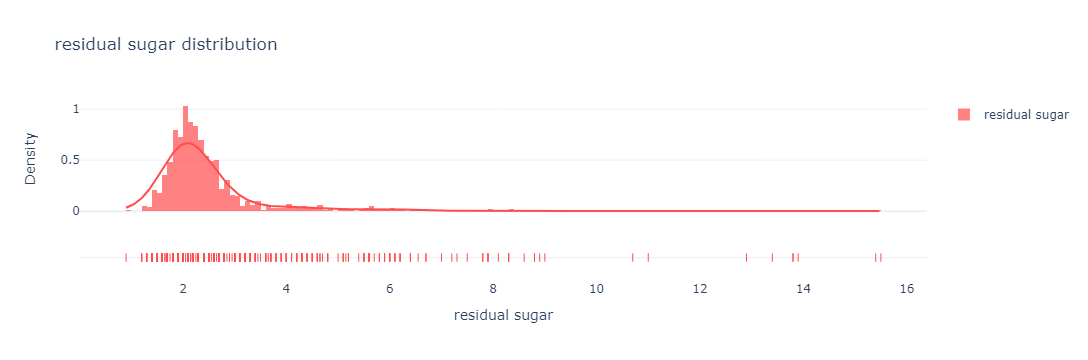

In [22]:
fig = ff.create_distplot([train['residual sugar']],['residual sugar'],bin_size=0.1,colors=colors)
fig.update_layout(title="residual sugar distribution",xaxis_title="residual sugar",yaxis_title="Density",font=dict(size=12))
iplot(fig, filename='Basic Distplot')

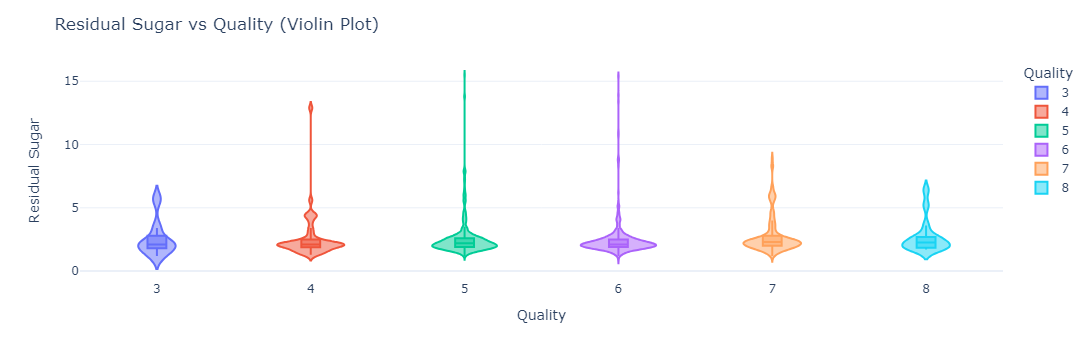

In [43]:
fig = px.violin(train, x='quality', y='residual sugar', box=True, points=False, color="quality",
                category_orders={"quality": sorted(train['quality'].unique())})

fig.update_layout(
    title="Residual Sugar vs Quality (Violin Plot)",
    xaxis_title="Quality",
    yaxis_title="Residual Sugar",
    legend_title="Quality",
    font=dict(size=12)
)

fig.show()

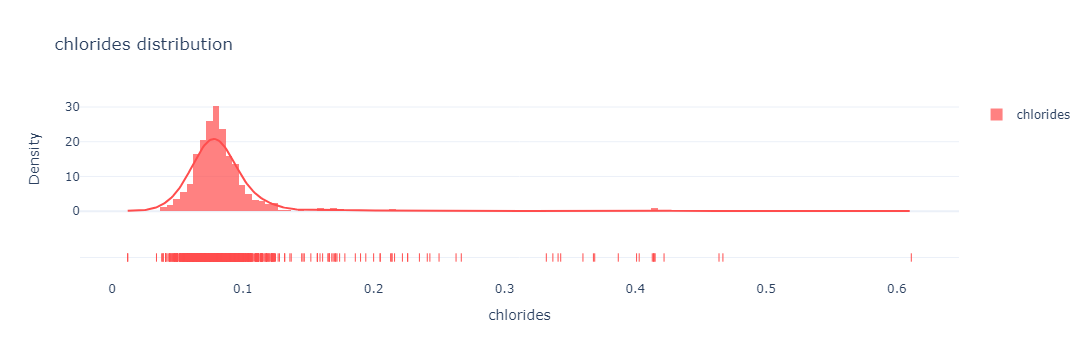

In [24]:
fig = ff.create_distplot([train['chlorides']],['chlorides'],bin_size=0.005,colors=colors)
fig.update_layout(title="chlorides distribution",xaxis_title="chlorides",yaxis_title="Density",font=dict(size=12))
iplot(fig, filename='Basic Distplot')

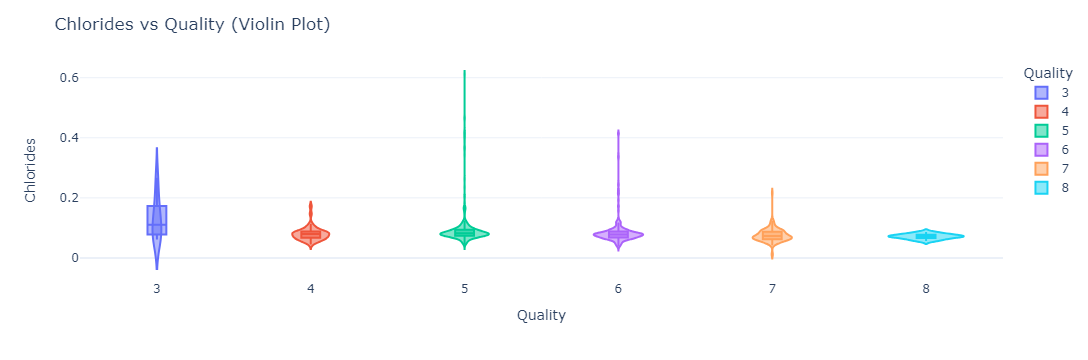

In [45]:
fig = px.violin(train, x='quality', y='chlorides', box=True, points=False, color="quality",
                category_orders={"quality": sorted(train['quality'].unique())})

fig.update_layout(
    title="Chlorides vs Quality (Violin Plot)",
    xaxis_title="Quality",
    yaxis_title="Chlorides",
    legend_title="Quality",
    font=dict(size=12)
)

fig.show()

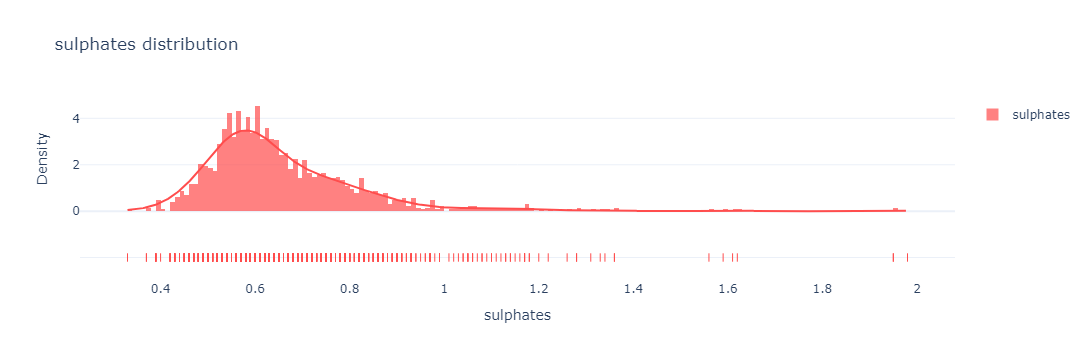

In [26]:
fig = ff.create_distplot([train['sulphates']],['sulphates'],bin_size=0.01,colors=colors)
fig.update_layout(title=" sulphates distribution",xaxis_title=" sulphates",yaxis_title="Density",font=dict(size=12))
iplot(fig, filename='Basic Distplot')

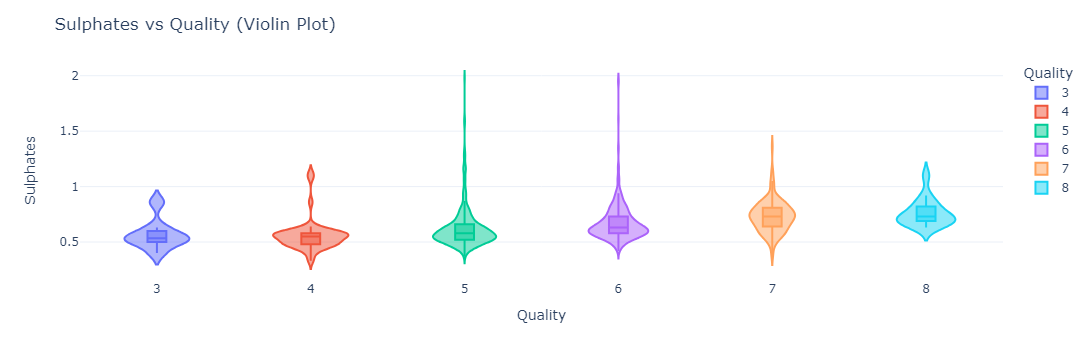

In [46]:
fig = px.violin(train, x='quality', y='sulphates', box=True, points=False, color="quality",
                category_orders={"quality": sorted(train['quality'].unique())})

fig.update_layout(
    title="Sulphates vs Quality (Violin Plot)",
    xaxis_title="Quality",
    yaxis_title="Sulphates",
    legend_title="Quality",
    font=dict(size=12)
)

fig.show()

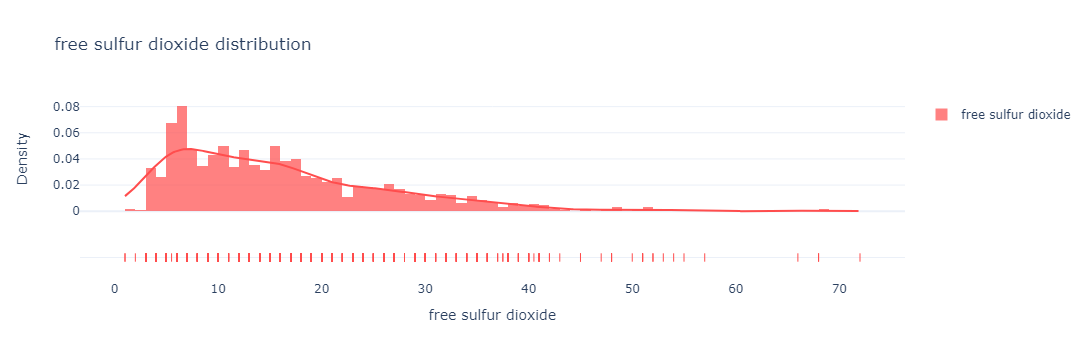

In [28]:
fig = ff.create_distplot([train['free sulfur dioxide']],['free sulfur dioxide'],bin_size=1,colors=colors)
fig.update_layout(title=" free sulfur dioxide distribution",xaxis_title="free sulfur dioxide",yaxis_title="Density",font=dict(size=12))
iplot(fig, filename='Basic Distplot')

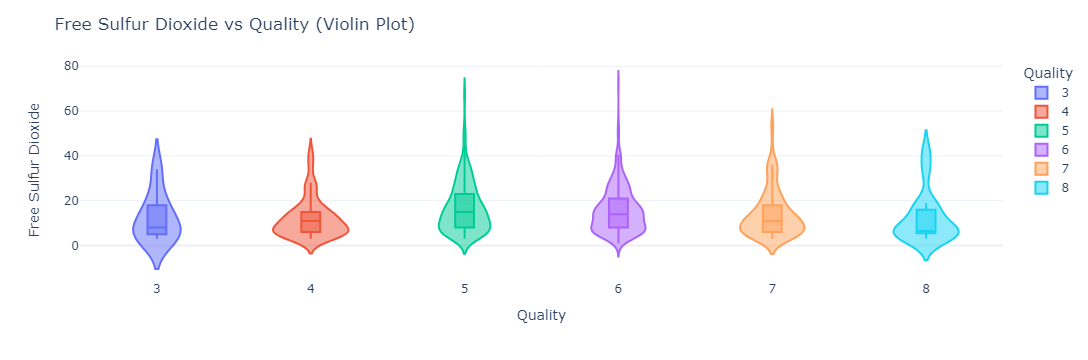

In [49]:
fig = px.violin(train, x='quality', y='free sulfur dioxide', box=True, points=False, color="quality",
                category_orders={"quality": sorted(train['quality'].unique())})

fig.update_layout(
    title="Free Sulfur Dioxide vs Quality (Violin Plot)",
    xaxis_title="Quality",
    yaxis_title="Free Sulfur Dioxide",
    legend_title="Quality",
    font=dict(size=12)
)

fig.show()

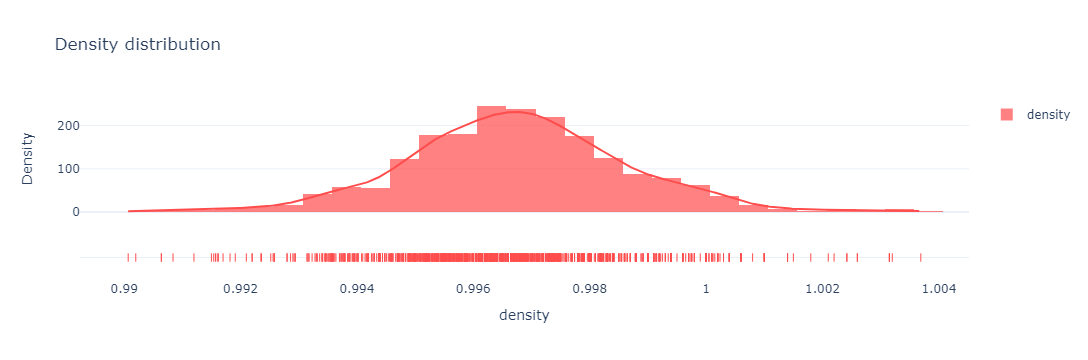

In [30]:
fig = ff.create_distplot([train['density']],['density'],bin_size=0.0005,colors=colors)
fig.update_layout(title=" Density distribution",xaxis_title="density",yaxis_title="Density",font=dict(size=12))
iplot(fig, filename='Basic Distplot')

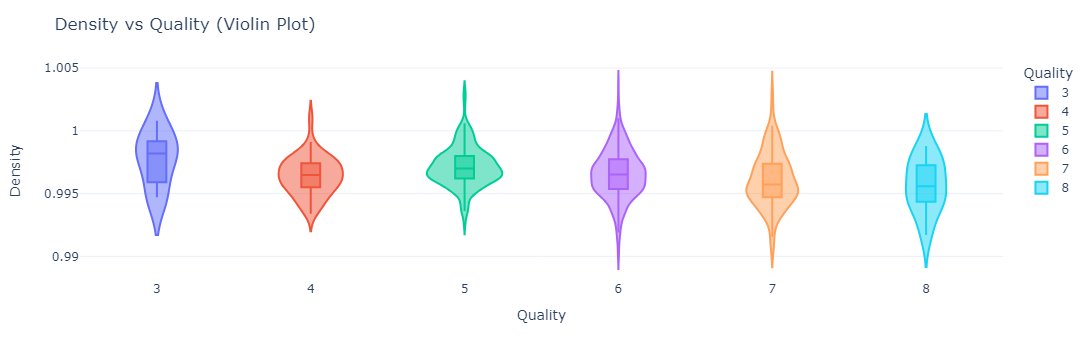

In [50]:
fig = px.violin(train, x='quality', y='density', box=True, points=False, color="quality",
                category_orders={"quality": sorted(train['quality'].unique())})

fig.update_layout(
    title="Density vs Quality (Violin Plot)",
    xaxis_title="Quality",
    yaxis_title="Density",
    legend_title="Quality",
    font=dict(size=12)
)

fig.show()

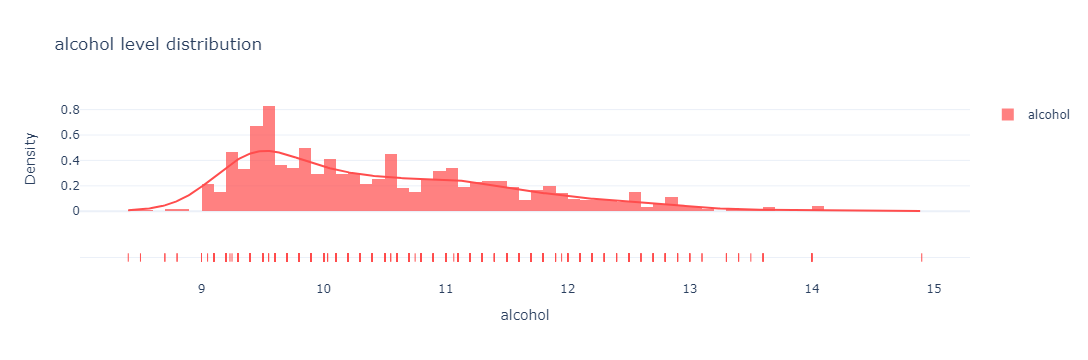

In [32]:
fig = ff.create_distplot([train['alcohol']],['alcohol'],bin_size=0.1,colors=colors)
fig.update_layout(title=" alcohol level distribution",xaxis_title="alcohol",yaxis_title="Density",font=dict(size=12))
iplot(fig, filename='Basic Distplot')

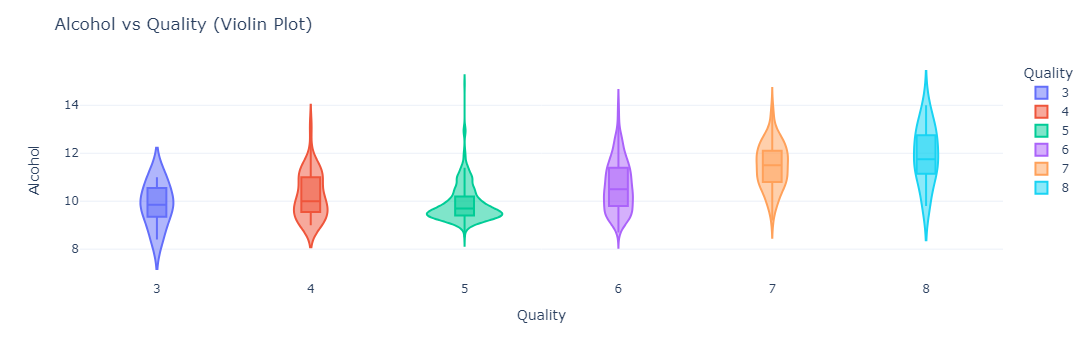

In [51]:
fig = px.violin(train, x='quality', y='alcohol', box=True, points=False, color="quality",
                category_orders={"quality": sorted(train['quality'].unique())})

fig.update_layout(
    title="Alcohol vs Quality (Violin Plot)",
    xaxis_title="Quality",
    yaxis_title="Alcohol",
    legend_title="Quality",
    font=dict(size=12)
)

fig.show()